In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **<font color='#8d5383'>import library & data</font>**

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DoctorVisits.csv")
data.head()

,rownames,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


## **<font color='#8d5383'>Data preprocessing</font>**

In [ ]:
data.info()
data.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rownames   5190 non-null   int64  
 1   visits     5190 non-null   int64  
 2   gender     5190 non-null   object 
 3   age        5190 non-null   float64
 4   income     5190 non-null   float64
 5   illness    5190 non-null   int64  
 6   reduced    5190 non-null   int64  
 7   health     5190 non-null   int64  
 8   private    5190 non-null   object 
 9   freepoor   5190 non-null   object 
 10  freerepat  5190 non-null   object 
 11  nchronic   5190 non-null   object 
 12  lchronic   5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rownames,5190.0,NaN,NaN,NaN,2595.5,1498.368279,1.0,1298.25,2595.5,3892.75,5190.0
visits,5190.0,NaN,NaN,NaN,0.301734,0.798134,0.0,0.0,0.0,0.0,9.0
gender,5190,2,female,2702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5190.0,NaN,NaN,NaN,0.406385,0.204782,0.19,0.22,0.32,0.62,0.72
income,5190.0,NaN,NaN,NaN,0.58316,0.368907,0.0,0.25,0.55,0.9,1.5
illness,5190.0,NaN,NaN,NaN,1.431985,1.384152,0.0,0.0,1.0,2.0,5.0
reduced,5190.0,NaN,NaN,NaN,0.86185,2.887628,0.0,0.0,0.0,0.0,14.0
health,5190.0,NaN,NaN,NaN,1.217534,2.124266,0.0,0.0,0.0,2.0,12.0
private,5190,2,no,2892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freepoor,5190,2,no,4968,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **<font color='#2e8b57'> missing value </font>**

In [ ]:
# data.isnull().sum()

# بررسی داده‌های گم‌شده
missing_values = data.isnull().sum()
print("\nداده‌های گم‌شده:\n\n", missing_values)


داده‌های گم‌شده:

 rownames     0
visits       0
gender       0
age          0
income       0
illness      0
reduced      0
health       0
private      0
freepoor     0
freerepat    0
nchronic     0
lchronic     0
dtype: int64


#### **<font color='#2e8b57'> Outlier </font>**

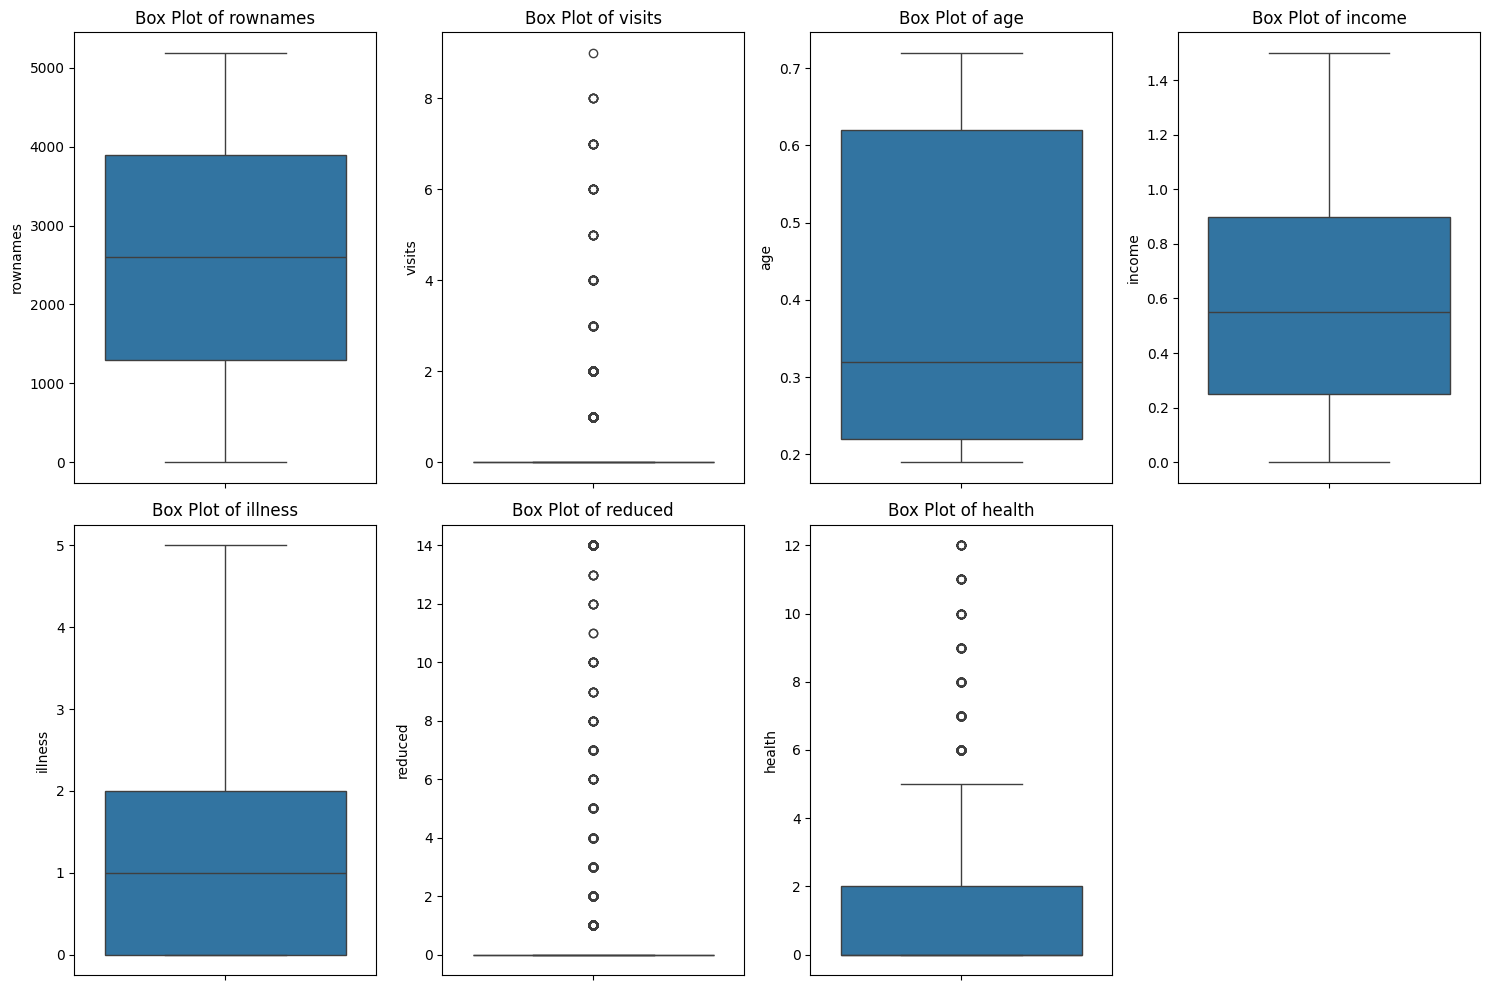

In [ ]:
# بررسی داده‌های پرت

# جدا کردن ستون‌های عددی
numeric_columns = data.select_dtypes(include=[np.number])

# تعداد ستون‌های عددی
num_columns = len(numeric_columns.columns)

# محاسبه تعداد ردیف‌ها و ستون‌ها برای زیرنمودارها
rows = (num_columns // 4) + (1 if num_columns % 4 != 0 else 0)
cols = 4

# رسم نمودار جعبه‌ای برای هر ستون عددی
plt.figure(figsize=(15, 5 * rows))  # تنظیم اندازه شکل
for i, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(rows, cols, i)  # تقسیم نمودار به چندین قسمت
    sns.boxplot(y=numeric_columns[column])
    plt.title(f"Box Plot of {column}")
    plt.tight_layout()

plt.show()

#### **<font color='#2e8b57'> plot </font>**

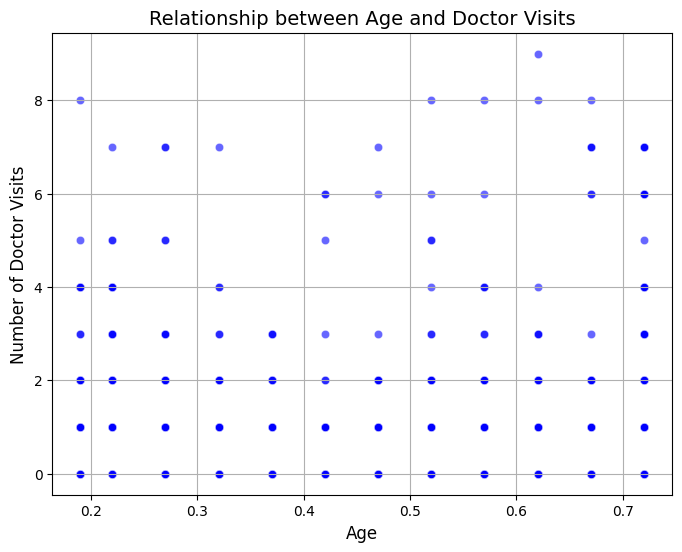

In [ ]:
# نمودار پراکندگی برای سن و تعداد ویزیت‌ها
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['age'], y=data['visits'], color='blue', alpha=0.6)
plt.title('Relationship between Age and Doctor Visits', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Doctor Visits', fontsize=12)
plt.grid(True)
plt.show()

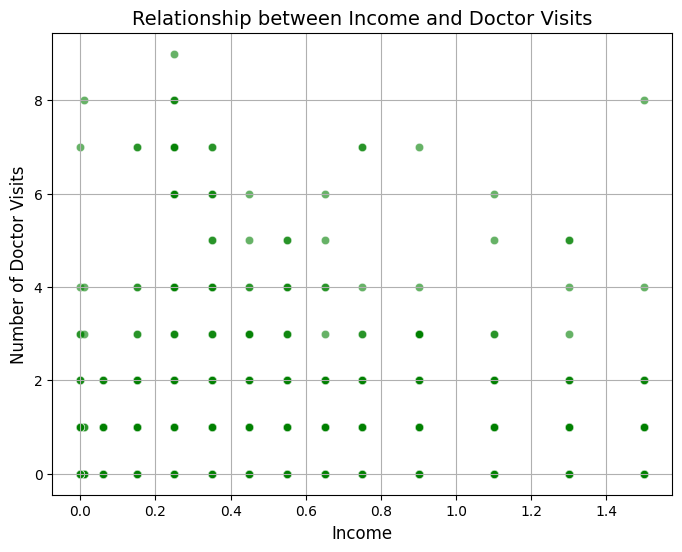

In [ ]:
# نمودار پراکندگی برای درآمد و تعداد ویزیت‌ها
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['income'], y=data['visits'], color='green', alpha=0.6)
plt.title('Relationship between Income and Doctor Visits', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Number of Doctor Visits', fontsize=12)
plt.grid(True)
plt.show()

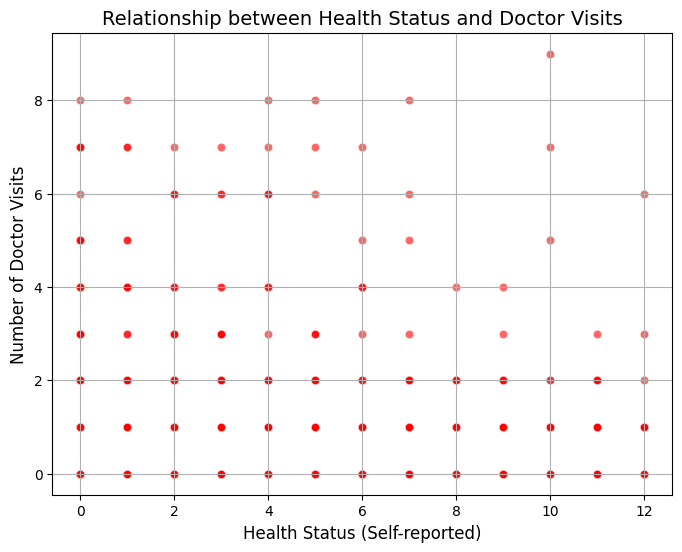

In [ ]:
# نمودار پراکندگی برای وضعیت سلامتی و تعداد ویزیت‌ها
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['health'], y=data['visits'], color='red', alpha=0.6)
plt.title('Relationship between Health Status and Doctor Visits', fontsize=14)
plt.xlabel('Health Status (Self-reported)', fontsize=12)
plt.ylabel('Number of Doctor Visits', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-11-105d164c517f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='visits', data=data, palette='pastel')


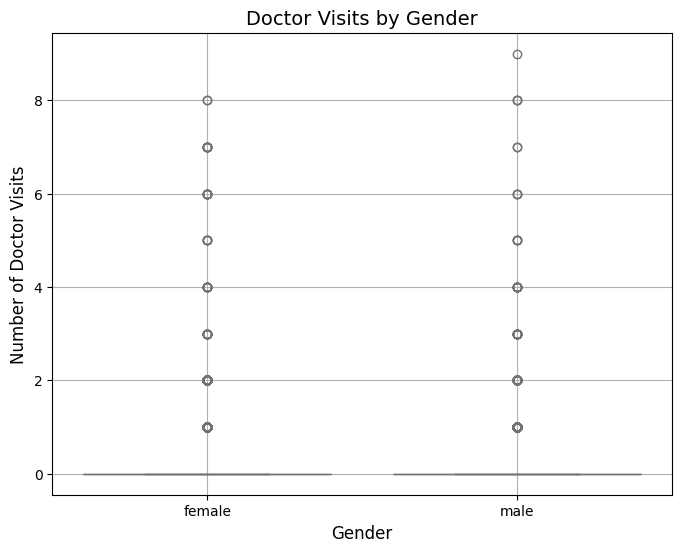

In [ ]:
# نمودار جعبه‌ای برای جنسیت و تعداد ویزیت‌ها
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='visits', data=data, palette='pastel')
plt.title('Doctor Visits by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Doctor Visits', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-12-3dca9807556f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='private', y='visits', data=data, palette='pastel')


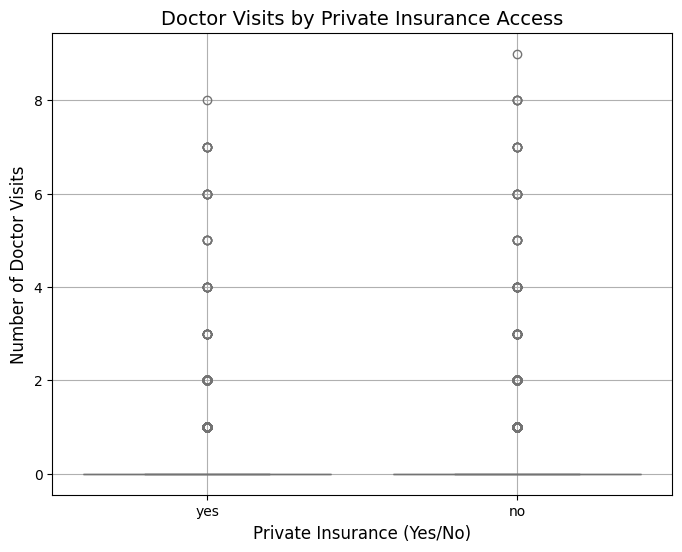

In [ ]:
# نمودار جعبه‌ای برای دسترسی به بیمه خصوصی و تعداد ویزیت‌ها
plt.figure(figsize=(8, 6))
sns.boxplot(x='private', y='visits', data=data, palette='pastel')
plt.title('Doctor Visits by Private Insurance Access', fontsize=14)
plt.xlabel('Private Insurance (Yes/No)', fontsize=12)
plt.ylabel('Number of Doctor Visits', fontsize=12)
plt.grid(True)
plt.show()

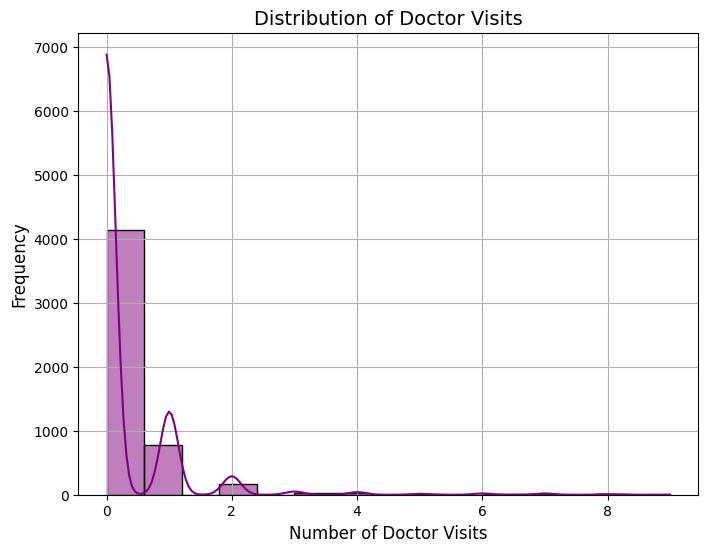

In [ ]:
# نمودار هیستوگرام برای تعداد ویزیت‌ها
plt.figure(figsize=(8, 6))
sns.histplot(data['visits'], bins=15, kde=True, color='purple')
plt.title('Distribution of Doctor Visits', fontsize=14)
plt.xlabel('Number of Doctor Visits', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

#### **<font color='#2e8b57'> correlation </font>**

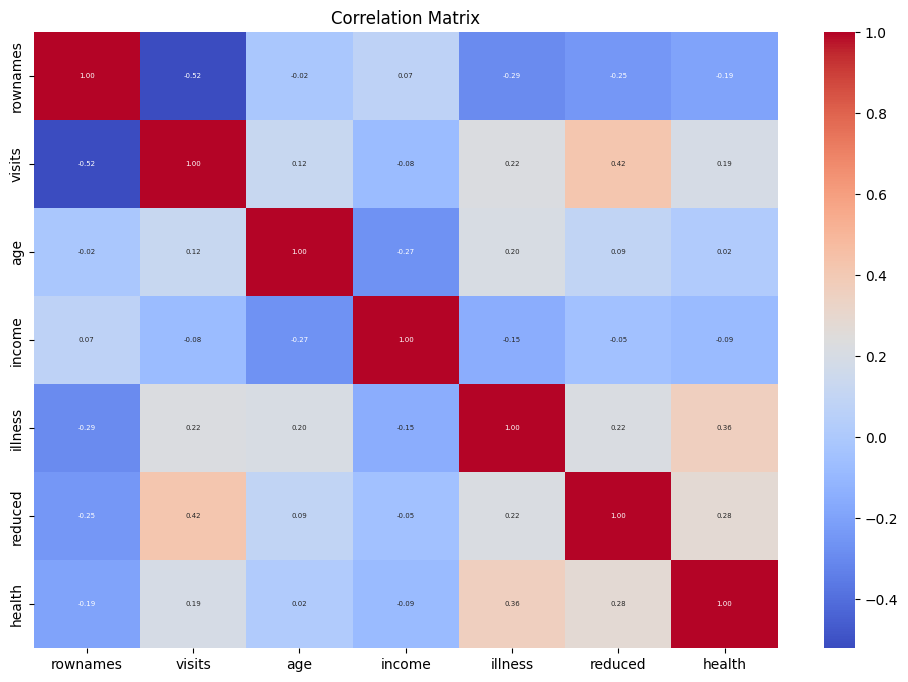

In [ ]:
# بررسی همبستگی

# جدا کردن ستون‌های عددی
numeric_columns = data.select_dtypes(include=[np.number])

# محاسبه ماتریس همبستگی
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5})
plt.title("Correlation Matrix")
plt.show()

In [ ]:

data.columns

Index(['rownames', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

#### **<font color='#2e8b57'> Target definition </font>**

In [ ]:
X = data.drop(['visits'], axis=1)
y = data['visits']

In [ ]:
X.head()

,rownames,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,male,0.19,0.45,2,5,1,no,no,no,yes,no



## **<font color='#8d5383'>Modeling</font>**

#### **<font color='#2e8b57'> split x&y </font>**

In [ ]:
y

,visits
0,1
1,1
2,1
3,1
4,1
...,...
5185,0
5186,0
5187,0
5188,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **<font color='#2e8b57'> XGBoost </font>**

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['gender', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic']
le = LabelEncoder()

for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [ ]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)
print(f'XGBoost - RMSE: {xgb_rmse:.4f}, R2: {xgb_r2:.4f}')

XGBoost - RMSE: 0.7068, R2: 0.4350


#### **<font color='#2e8b57'> Random Forest </font>**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)
print(f'Random Forest - RMSE: {rf_rmse:.4f}, R2: {rf_r2:.4f}')

Random Forest - RMSE: 0.6571, R2: 0.5117


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)



#### **<font color='#2e8b57'> epochs = 500 </font>**
<font color='#8d5360'> Neural Network Poisson - RMSE: 0.6812, R2: 0.4753</font>


In [ ]:

# تعریف مدل شبکه عصبی
class PoissonNN(nn.Module):
    def __init__(self, input_dim):
        super(PoissonNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.nn.functional.softplus(self.fc3(x))  # Ensure positive outputs
        return x

# تبدیل داده‌ها به تنسور
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


# مقداردهی اولیه مدل، بهینه‌ساز و تابع زیان
input_dim = X_train.shape[1]
model = PoissonNN(input_dim=input_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.PoissonNLLLoss(log_input=False)

# آموزش مدل
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    if torch.isnan(loss):
        print(f"Loss became NaN at epoch {epoch+1}. Stopping training.")
        break

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# ارزیابی مدل
model.eval()
with torch.no_grad():
    nn_preds = model(X_test_tensor).detach().numpy()

# محاسبه معیارهای ارزیابی
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_preds))
nn_r2 = r2_score(y_test, nn_preds)
print(f'Neural Network Poisson - RMSE: {nn_rmse:.4f}, R2: {nn_r2:.4f}')

Epoch 10/500, Loss: 4.0692
Epoch 20/500, Loss: 4.3053
Epoch 30/500, Loss: 3.3784
Epoch 40/500, Loss: 1.1187
Epoch 50/500, Loss: 1.6742
Epoch 60/500, Loss: 0.8706
Epoch 70/500, Loss: 0.6407
Epoch 80/500, Loss: 1.0465
Epoch 90/500, Loss: 0.4112
Epoch 100/500, Loss: 0.3789
Epoch 110/500, Loss: 0.2850
Epoch 120/500, Loss: 0.2437
Epoch 130/500, Loss: 0.2426
Epoch 140/500, Loss: 0.2400
Epoch 150/500, Loss: 0.2378
Epoch 160/500, Loss: 0.2360
Epoch 170/500, Loss: 0.2349
Epoch 180/500, Loss: 0.2339
Epoch 190/500, Loss: 0.2329
Epoch 200/500, Loss: 0.2319
Epoch 210/500, Loss: 0.2310
Epoch 220/500, Loss: 0.2300
Epoch 230/500, Loss: 0.2291
Epoch 240/500, Loss: 0.2282
Epoch 250/500, Loss: 0.2274
Epoch 260/500, Loss: 0.2265
Epoch 270/500, Loss: 0.2256
Epoch 280/500, Loss: 0.2247
Epoch 290/500, Loss: 0.2238
Epoch 300/500, Loss: 0.2229
Epoch 310/500, Loss: 0.2220
Epoch 320/500, Loss: 0.2211
Epoch 330/500, Loss: 0.2202
Epoch 340/500, Loss: 0.2192
Epoch 350/500, Loss: 0.2182
Epoch 360/500, Loss: 0.2172
E


#### **<font color='#2e8b57'> epochs = 5000 </font>**
<font color='#8d5360'> Neural Network Poisson - RMSE: 0.6368, R2: 0.5414</font>


In [ ]:

# تعریف مدل شبکه عصبی
class PoissonNN(nn.Module):
    def __init__(self, input_dim):
        super(PoissonNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.nn.functional.softplus(self.fc3(x))  # Ensure positive outputs
        return x

# تبدیل داده‌ها به تنسور
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


# مقداردهی اولیه مدل، بهینه‌ساز و تابع زیان
input_dim = X_train.shape[1]
model = PoissonNN(input_dim=input_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.PoissonNLLLoss(log_input=False)

# آموزش مدل
epochs = 4000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    if torch.isnan(loss):
        print(f"Loss became NaN at epoch {epoch+1}. Stopping training.")
        break

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# ارزیابی مدل
model.eval()
with torch.no_grad():
    nn_preds = model(X_test_tensor).detach().numpy()

# محاسبه معیارهای ارزیابی
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_preds))
nn_r2 = r2_score(y_test, nn_preds)
print(f'Neural Network Poisson - RMSE: {nn_rmse:.4f}, R2: {nn_r2:.4f}')

Epoch 10/4000, Loss: 1.6074
Epoch 20/4000, Loss: 0.7985
Epoch 30/4000, Loss: 1.5637
Epoch 40/4000, Loss: 0.2966
Epoch 50/4000, Loss: 0.3431
Epoch 60/4000, Loss: 0.3144
Epoch 70/4000, Loss: 0.2843
Epoch 80/4000, Loss: 0.2679
Epoch 90/4000, Loss: 0.2609
Epoch 100/4000, Loss: 0.2572
Epoch 110/4000, Loss: 0.2544
Epoch 120/4000, Loss: 0.2519
Epoch 130/4000, Loss: 0.2496
Epoch 140/4000, Loss: 0.2475
Epoch 150/4000, Loss: 0.2456
Epoch 160/4000, Loss: 0.2437
Epoch 170/4000, Loss: 0.2421
Epoch 180/4000, Loss: 0.2405
Epoch 190/4000, Loss: 0.2390
Epoch 200/4000, Loss: 0.2376
Epoch 210/4000, Loss: 0.2363
Epoch 220/4000, Loss: 0.2351
Epoch 230/4000, Loss: 0.2338
Epoch 240/4000, Loss: 0.2327
Epoch 250/4000, Loss: 0.2316
Epoch 260/4000, Loss: 0.2305
Epoch 270/4000, Loss: 0.2294
Epoch 280/4000, Loss: 0.2284
Epoch 290/4000, Loss: 0.2274
Epoch 300/4000, Loss: 0.2264
Epoch 310/4000, Loss: 0.2254
Epoch 320/4000, Loss: 0.2245
Epoch 330/4000, Loss: 0.2301
Epoch 340/4000, Loss: 0.2231
Epoch 350/4000, Loss: 0

## **<font color='#8d5383'>Comparison</font>**

In [ ]:
print('\n🔍 مقایسه مدل‌ها:')
print(f'XGBoost - RMSE: {xgb_rmse:.4f}, R2: {xgb_r2:.4f}')
print(f'Random Forest - RMSE: {rf_rmse:.4f}, R2: {rf_r2:.4f}')
print(f'Poisson NN - RMSE: {nn_rmse:.4f}, R2: {nn_r2:.4f}')     # epochs = 4000


🔍 مقایسه مدل‌ها:
XGBoost - RMSE: 0.7068, R2: 0.4350
Random Forest - RMSE: 0.6571, R2: 0.5117
Poisson NN - RMSE: 0.6364, R2: 0.5420


## **<font color='#8d5383'>Model review</font>**


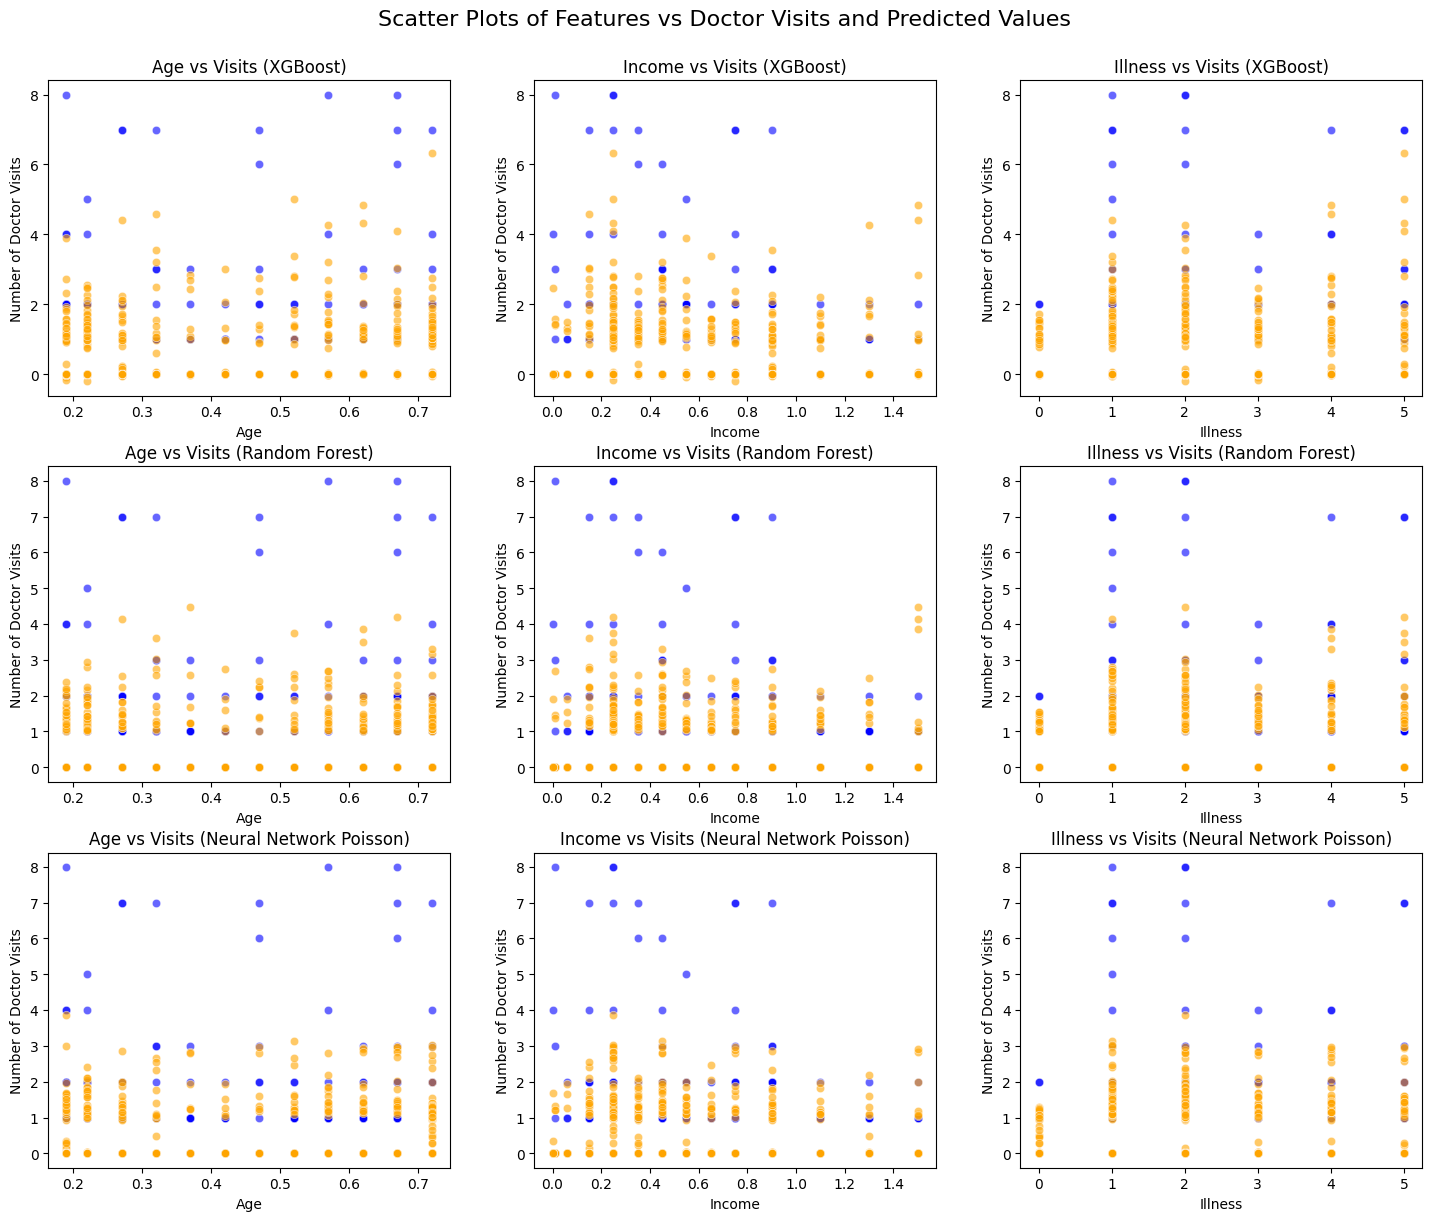

In [ ]:

# لیست مدل‌ها و پیش‌بینی‌های آن‌ها
models = {
    "XGBoost": xgb_preds,
    "Random Forest": rf_preds,
    "Neural Network Poisson": nn_preds.flatten()  # تبدیل به آرایه یک‌بعدی
}

# متغیرهای مستقل که می‌خواهیم بررسی کنیم
features = ["age", "income", "illness"]

# تعریف اندازه نمودار
fig, axes = plt.subplots(len(models), len(features), figsize=(15, 12))
fig.tight_layout(pad=3.0)

# ردیف‌ها برای مدل‌ها و ستون‌ها برای متغیرهای مستقل
for i, (model_name, preds) in enumerate(models.items()):
    for j, feature in enumerate(features):
        # نمودار پراکندگی برای مقایسه متغیر مستقل با تعداد ویزیت‌ها
        ax = axes[i, j]
        sns.scatterplot(
            x=X_test[feature],
            y=y_test,
            color='blue',
            alpha=0.6,
            ax=ax
        )
        sns.scatterplot(
            x=X_test[feature],
            y=preds,  # اکنون یک‌بعدی است
            color='orange',
            alpha=0.6,
            ax=ax
        )
        ax.set_title(f'{feature.capitalize()} vs Visits ({model_name})')
        ax.set_xlabel(feature.capitalize())
        ax.set_ylabel('Number of Doctor Visits')

# تنظیمات نهایی
plt.suptitle("Scatter Plots of Features vs Doctor Visits and Predicted Values", fontsize=16, y=1.02)
plt.show()

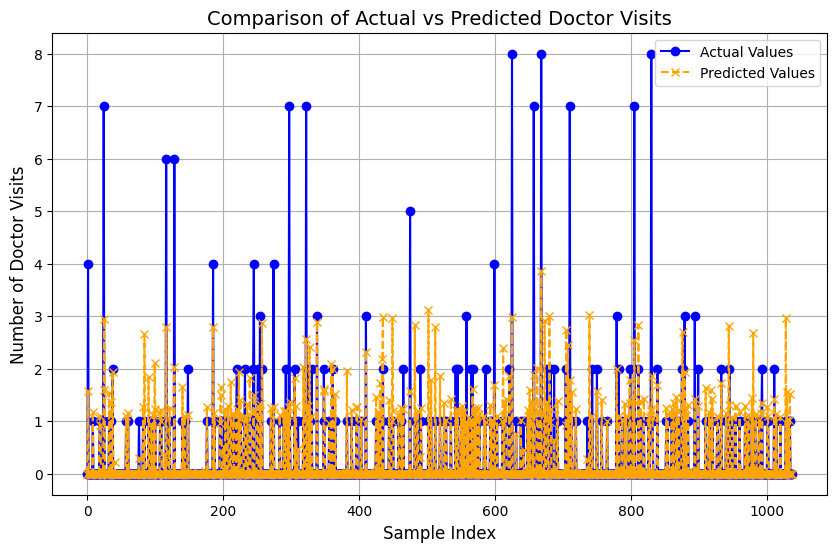

In [ ]:
# مقایسه مقادیر واقعی و پیش‌بینی‌شده
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', marker='o')
plt.plot(nn_preds, label='Predicted Values', color='orange', linestyle='--', marker='x')
plt.title('Comparison of Actual vs Predicted Doctor Visits', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Number of Doctor Visits', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

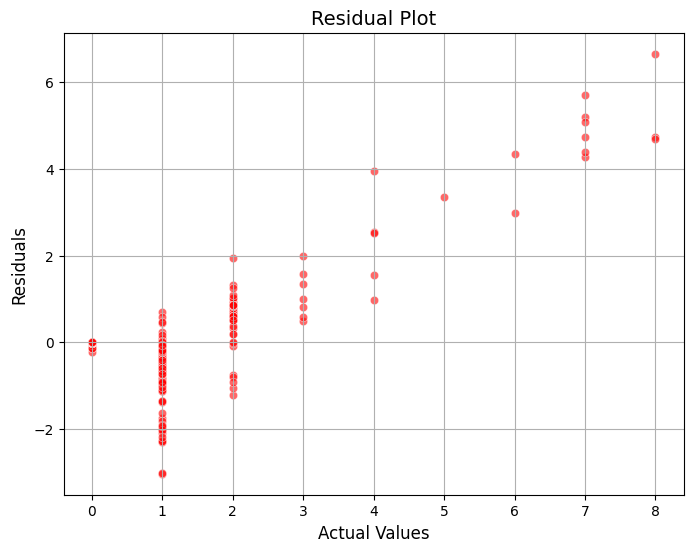

In [ ]:
# محاسبه باقیمانده‌ها
residuals = y_test.values.flatten() - nn_preds.flatten()

# رسم نمودار خطای مدل
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.flatten(), y=residuals, color='red', alpha=0.6)
# plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)
plt.show()

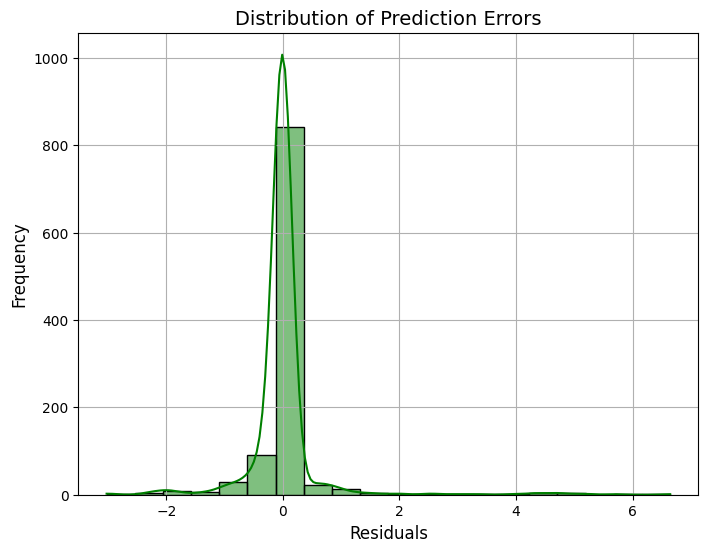

In [ ]:
# رسم نمودار توزیع خطاهای مدل
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color='green')
plt.title('Distribution of Prediction Errors', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()